# Deploying and Testing Serverless Applications
This lesson explores the differences between server-based and serverless deployments and environments. This lesson also introduces how an application framework, such as the AWS Serverless Application Model (AWS SAM), can simplify your deployment practices. AWS SAM can make the move to serverless more efficient. 

Using a real-world analogy of buying a new house, you can compare server-based deployments with serverless deployment. When you decide to buy a new house, you can buy a prebuilt house that is already standing and ready to move into or design and build a new house. 

## The server-based model is the existing house that you can move into.

Before you move in, you understand the layout and the rooms and how your family will fit into the house. You don’t need to know how the wood holds the house together or the types of nails used. You work with what’s physically already there. For example, the house has three bedrooms, two bathrooms, and a kitchen.

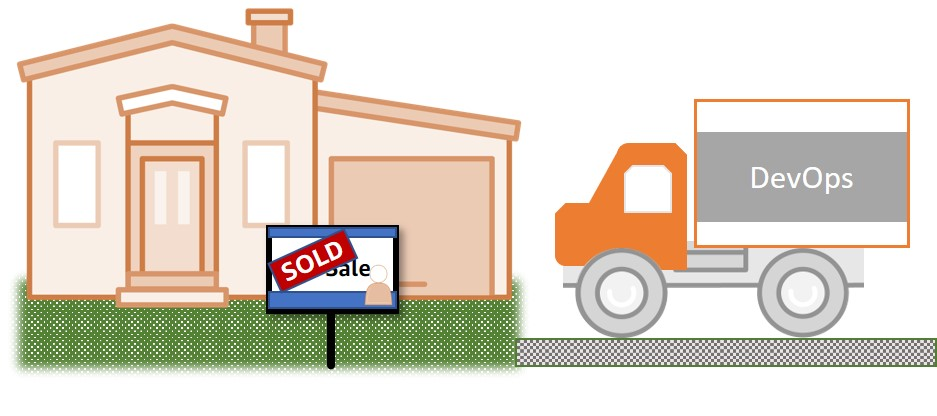

After you've decided to buy the prebuilt house, you pack your possessions into boxes. The moving company arrives and picks them up to bring (deploy) them to the new house. As a developer, the packing of your boxes and handing them to the movers compares with checking in your code. Then DevOps (the movers) are responsible for taking and deploying the code to the correct environment. The movers know the location of the house and which boxes go into which rooms.

## How a serverless deployment differs from a server-based deployment

### A serverless deployment is like designing and building a house using detailed specifications. 

When you design and build a house, you must tell the builders every detail of the house: 

- Number of rooms to build
- Room size
- Number of windows, doors, and light sockets
- Where to put the light sockets

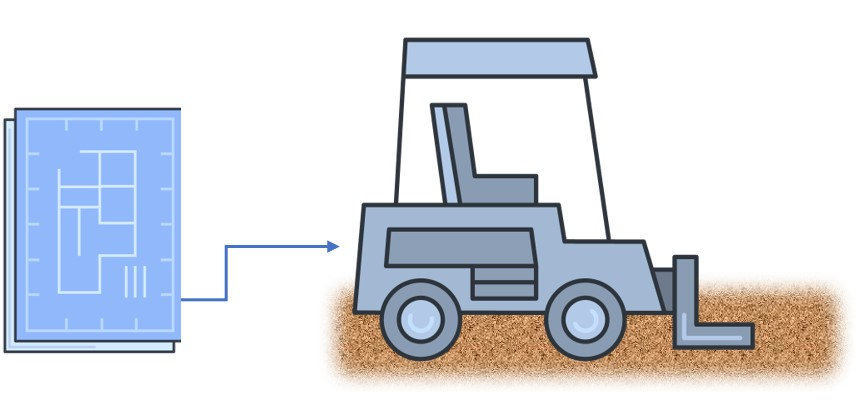

These details are conveyed to the building contractors through the blueprints. A blueprint is a template of how to build every component of the house. With this blueprint, you can visualize what the house looks like, and you can use that same blueprint to build many identical houses. With serverless, everything that your Lambda function needs is included in the blueprint, called the CloudFormation Template.

### The AWS CloudFormation template is considered the blueprint for the Lambda function.

The CloudFormation template specifies every detail of the Lambda function and the environment required for the Lambda function to run. CloudFormation provides a common language and format that all parts of AWS can read and understand.

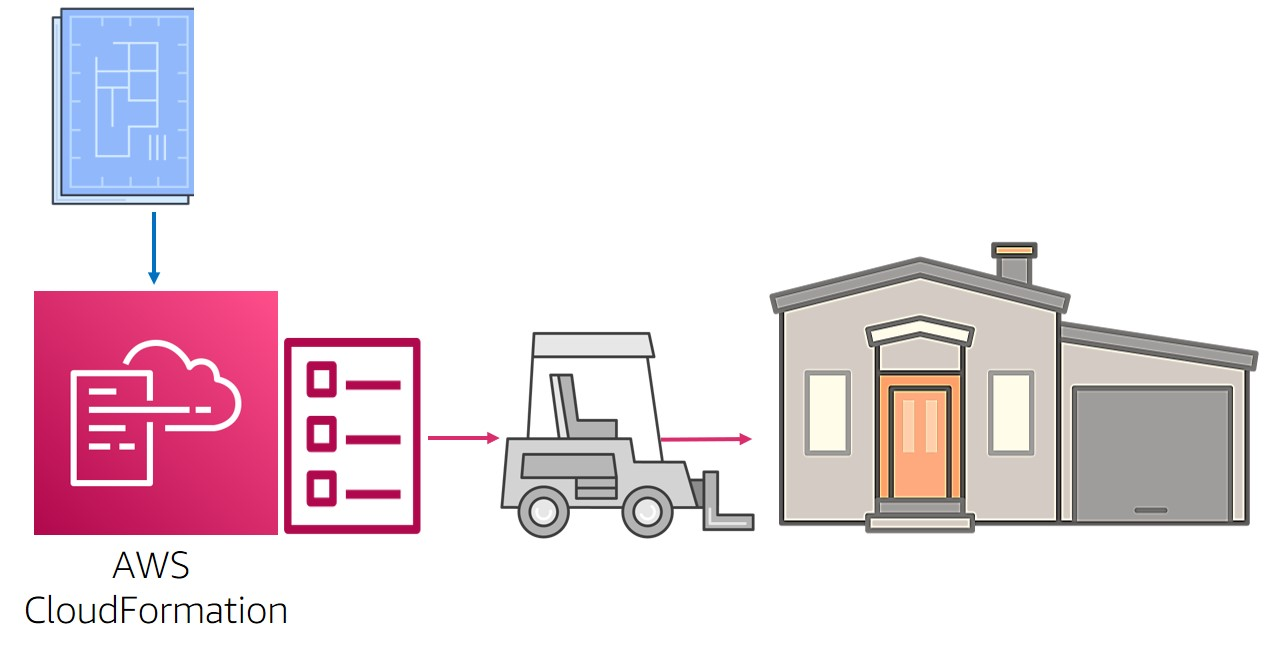

### CloudFormation is infrastructure as code.

The entire infrastructure needed for your Lambda function is written to a text file. This file (template) then deploys your desired stack. A stack is a collection of AWS resources that you can manage as a single unit. The template becomes the single source of truth for deploying identical stacks into any AWS account. Each time the Lambda function is invoked, it runs by using information provided in the CloudFormation template. 

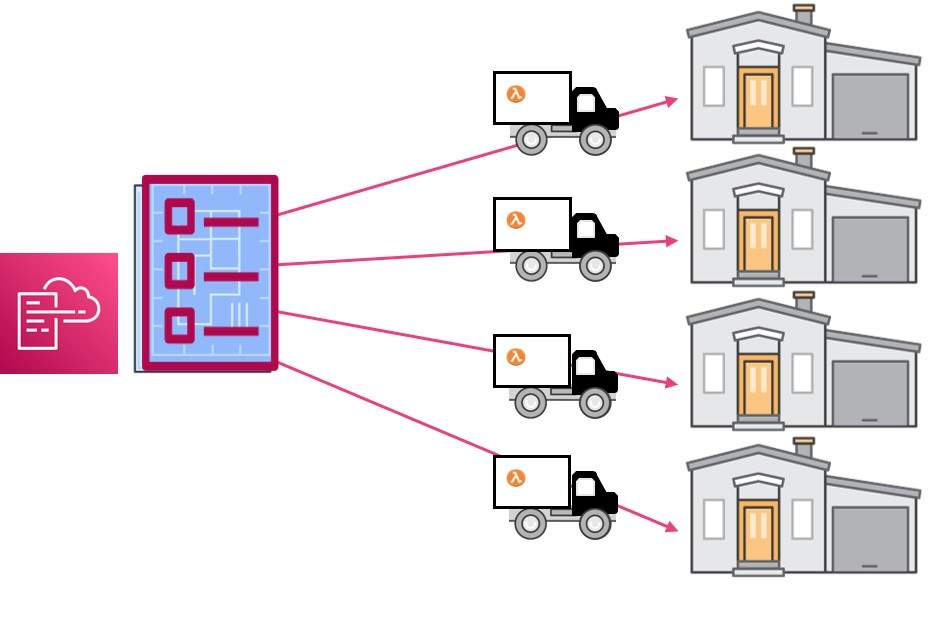

## Server-based development environments

In general, a developer workflow includes the following basic steps:

1. Author code
2. Test and debug changes in isolation
3. Merge your code into the larger application code and perform application testing

In a server-based deployment, this workflow is achieved by doing the following:

1. Pulling down a local copy of the application
2. Working locally through your IDE to code
3. Testing and debugging your code
4. Checking your changes into source control

The updated code is then picked up by a build-and-deploy process. For many developers, this is when they pass the code to a DevOps team member. DevOps validates the build and deploys the updated application to designated instances. As a developer, you then have access to a particular set of development and test instances. These are the environments where you perform additional application and integration testing and debugging. 

After testing is successful, DevOps follows a similar deployment process to update production instances with the tested application components. The build scripts and the environments that your code is deployed into are already established and waiting for your application code. This process is like the prebuilt house that is ready and waiting for you to move in. 

To view each of the build stages for server-based application deployment, select each number in the following graphic.

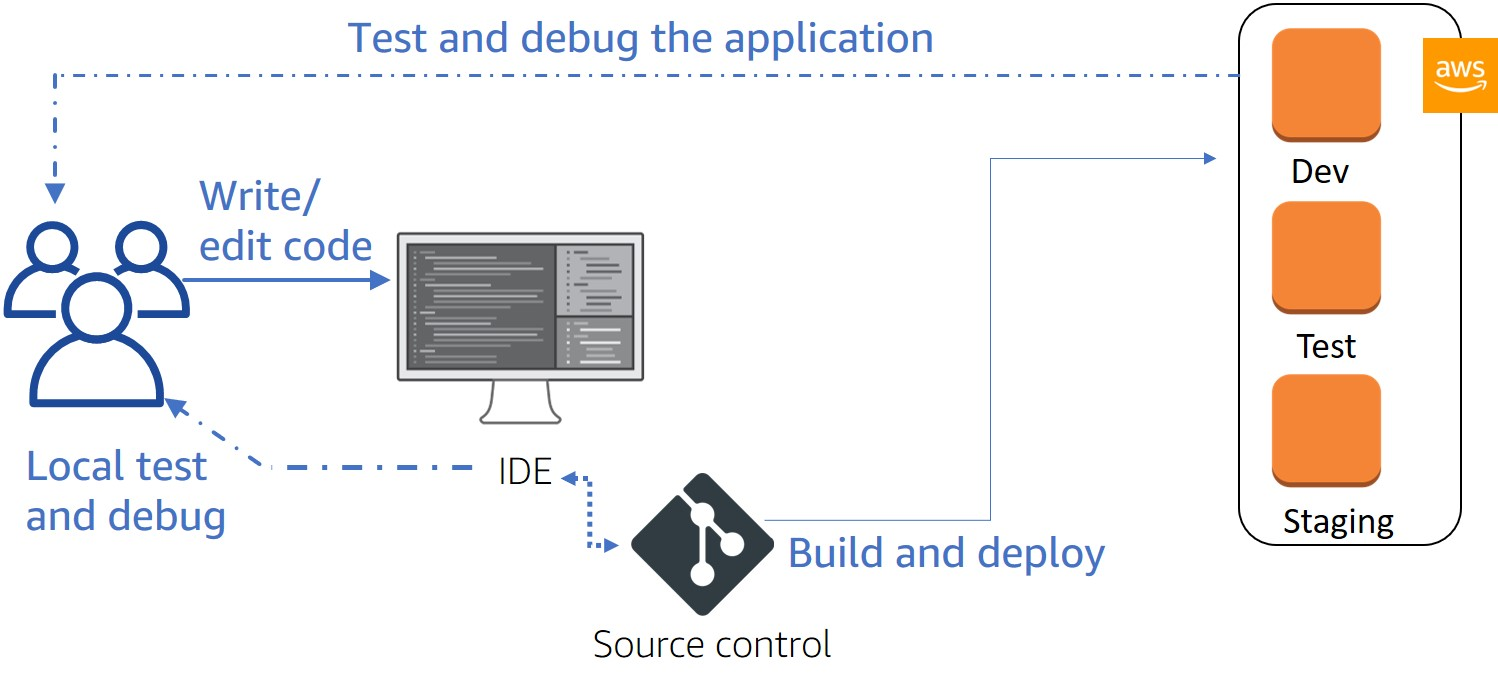

## Serverless development environments

In a serverless deployment, you provide all the components necessary to deploy your function: 

Code, bundled with any necessary dependencies
CloudFormation template, which is the blueprint for building the serverless environment
Like a blueprint for a house, the CloudFormation template can quickly become lengthy and difficult to manage. For example, if you have an application with a single API endpoint, the CloudFormation template must include mappings for IAM roles, API Gateway endpoints, and connections to the Amazon DynamoDB table. Including these details can result in up to 100 lines of code in a simple template.

### A key difference in the developer workflow is how the code and the application are tested.

Because serverless is hosted in the cloud, no option is available to check out a local copy of the application to do localized testing. You cannot recreate the environment specified in your CloudFormation template locally. Instead, you must have access to designated AWS accounts for testing. You can then perform realistic testing of your application in the cloud. With the appropriate access permissions, you can deploy and test your stack to any development, testing, staging, or production account in your organization. 

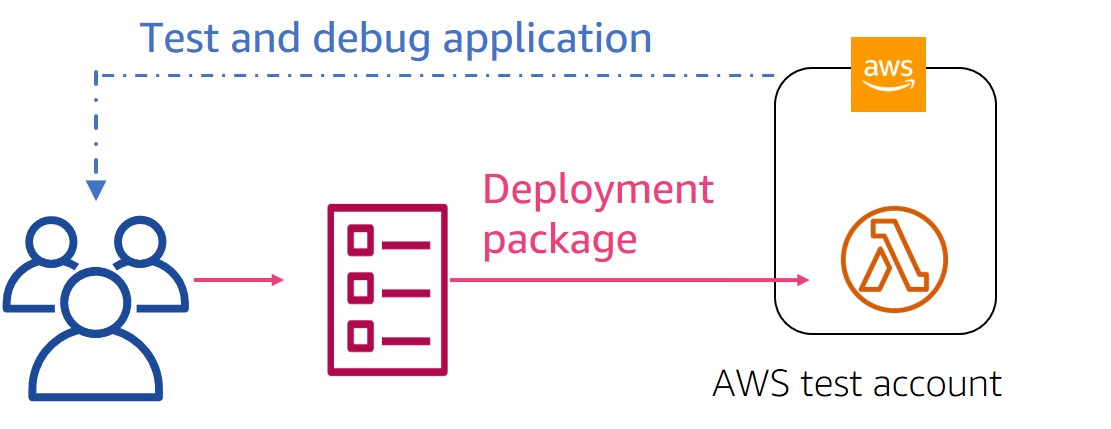

###  AWS SAM makes serverless development easier. 

Earlier in the course, you learned that AWS SAM uses a set of CloudFormation commands. When you provide AWS SAM with simplified instructions for your environment, it transforms that information into the fully detailed CloudFormation template that you can use to build your stack. All CloudFormation options are still available within AWS SAM. The service streamlines the configuration of commonly used serverless application resources.

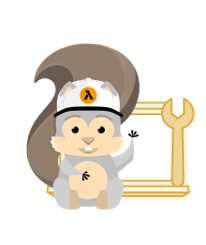

### Ensures environmental parity

AWS SAM streamlines the tasks for creating a stack and deploying the same stack to each account. 

### Simplifies experimentation

Without the overhead of maintaining instances, you can use AWS SAM to quickly start stacks for different feature branches. You can experiment without incurring costs outside of the actual invocations that run on that environment.

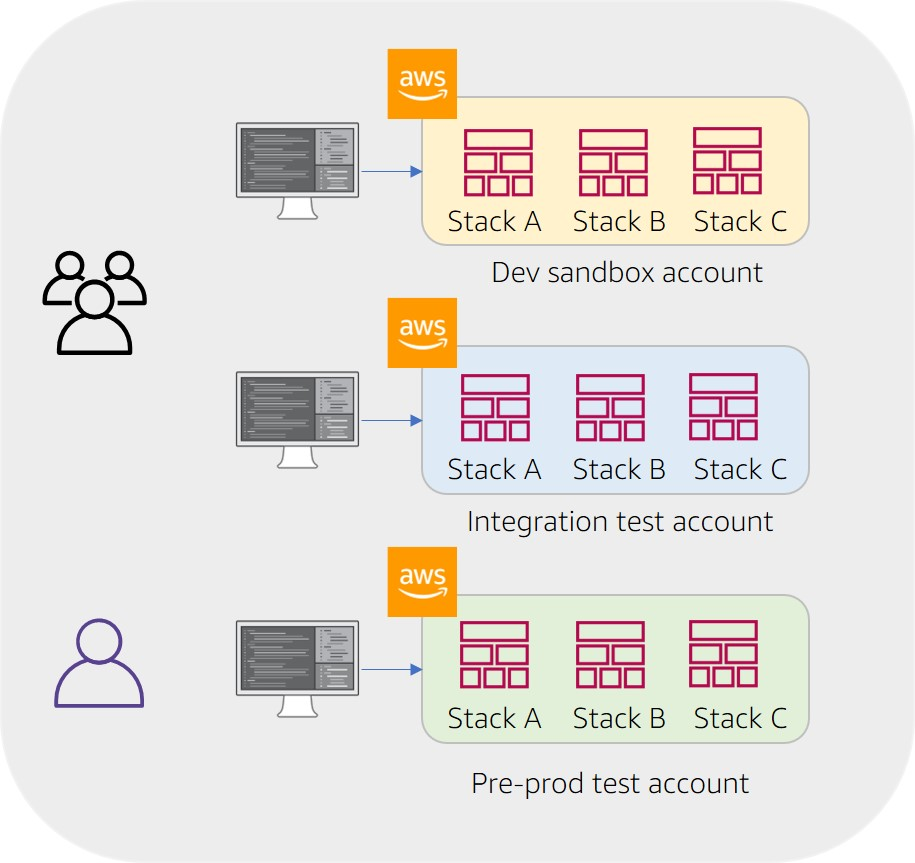

# 📝 AWS Serverless Pipeline Notes

## Overview
Create a serverless pipeline using AWS services:
- Trigger: S3 file upload
- Processing: Lambda function
- Storage: DynamoDB table
- Tools: AWS Cloud9, AWS SAM

## Flow Summary
1. Upload file to S3
2. S3 triggers a Lambda function
3. Lambda logs event and writes metadata to DynamoDB

## Components
- S3: Source of data (file uploads)
- Lambda: Event-driven compute to process S3 events
- DynamoDB: Stores file event data (e.g. filename, timestamp)
- SAM (Serverless Application Model): Defines infrastructure as code

## Key Features
- Fully serverless (no servers to manage)
- Automatically triggered on file upload
- Uses AWS IAM for permission management
- SAM CLI for local development and deployment

## Outcome
A simple, event-driven data pipeline built and deployed with SAM, triggered by file uploads, and saving results to DynamoDB.


## 📝 AWS Serverless Pipeline Notes

### Overview
Create a serverless pipeline using AWS services:
- Trigger: S3 file upload
- Processing: Lambda function
- Storage: DynamoDB table
- Tools: AWS Cloud9, AWS SAM

### Flow Summary
1. Upload file to S3
2. S3 triggers a Lambda function
3. Lambda logs event and writes metadata to DynamoDB

### Components
- S3: Source of data (file uploads)
- Lambda: Event-driven compute to process S3 events
- DynamoDB: Stores file event data (e.g. filename, timestamp)
- SAM (Serverless Application Model): Defines infrastructure as code

### Key Features
- Fully serverless (no servers to manage)
- Automatically triggered on file upload
- Uses AWS IAM for permission management
- SAM CLI for local development and deployment

### Outcome
A simple, event-driven data pipeline built and deployed with SAM, triggered by file uploads, and saving results to DynamoDB.


## Reduce risk using versions and aliases  

One potential challenge to serverless deployments is that when the function is deployed, it becomes live immediately. This means that a function can potentially go live without testing it, which puts your working applications at risk. This risk is especially true if you move toward an automated CI/CD pipeline and need to easily promote new code or roll back if there's a problem. To mitigate this risk, you can version your Lambda functions and add aliases to ensure safe deployments.

### Versioning

You can use versions to manage the deployment of your functions. For example, you can publish a new version of a function for beta testing without affecting users of the stable production version. Lambda creates a new version of your function each time that you publish the function. The new version is a copy of the unpublished version of the function. 



When you create a Lambda function, only one version exists, which is identified by $LATEST at the end of the Amazon Resource Name (ARN).

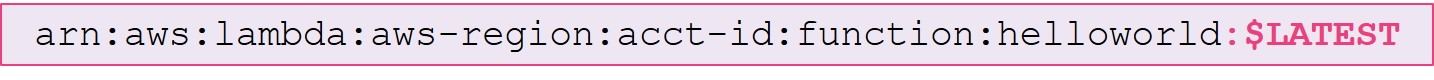

### Publish

Publish makes a snapshot copy of $LATEST. 



Enable versioning to create immutable snapshots of your function every time you publish it. 

Publish as many versions as you need. 
Each version results in a new sequential version number. 
Add the version number to the function ARN to reference it.
The snapshot becomes the new version and is immutable.

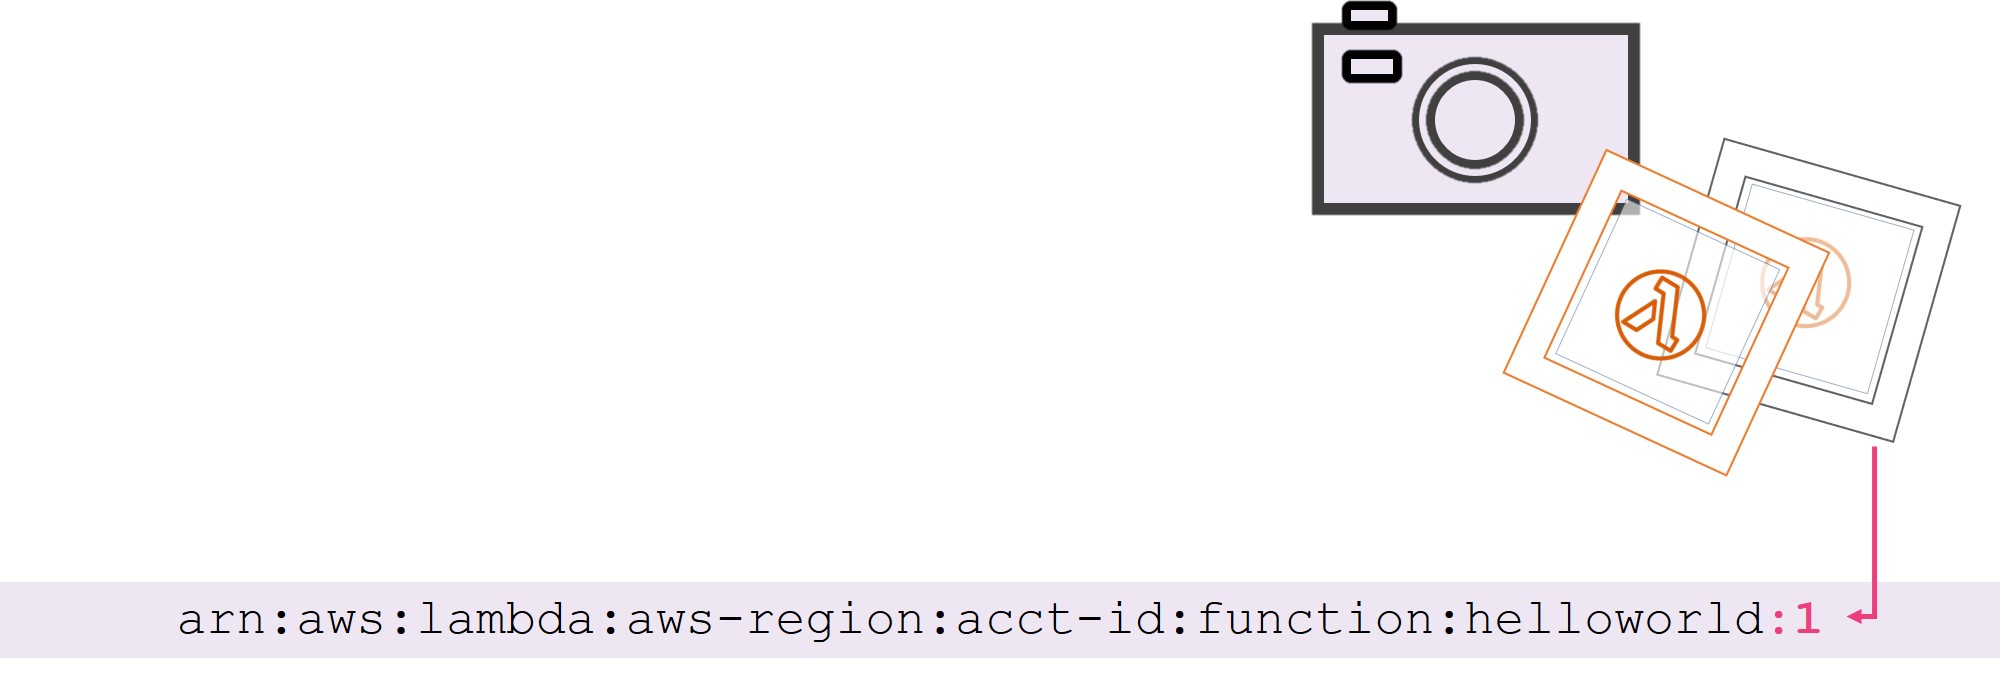

### Aliases

A Lambda alias is like a pointer to a specific function version. You can access the function version using the alias ARN. Each alias has a unique ARN. An alias can point only to a function version, not to another alias. You can update an alias to point to a new version of the function. 

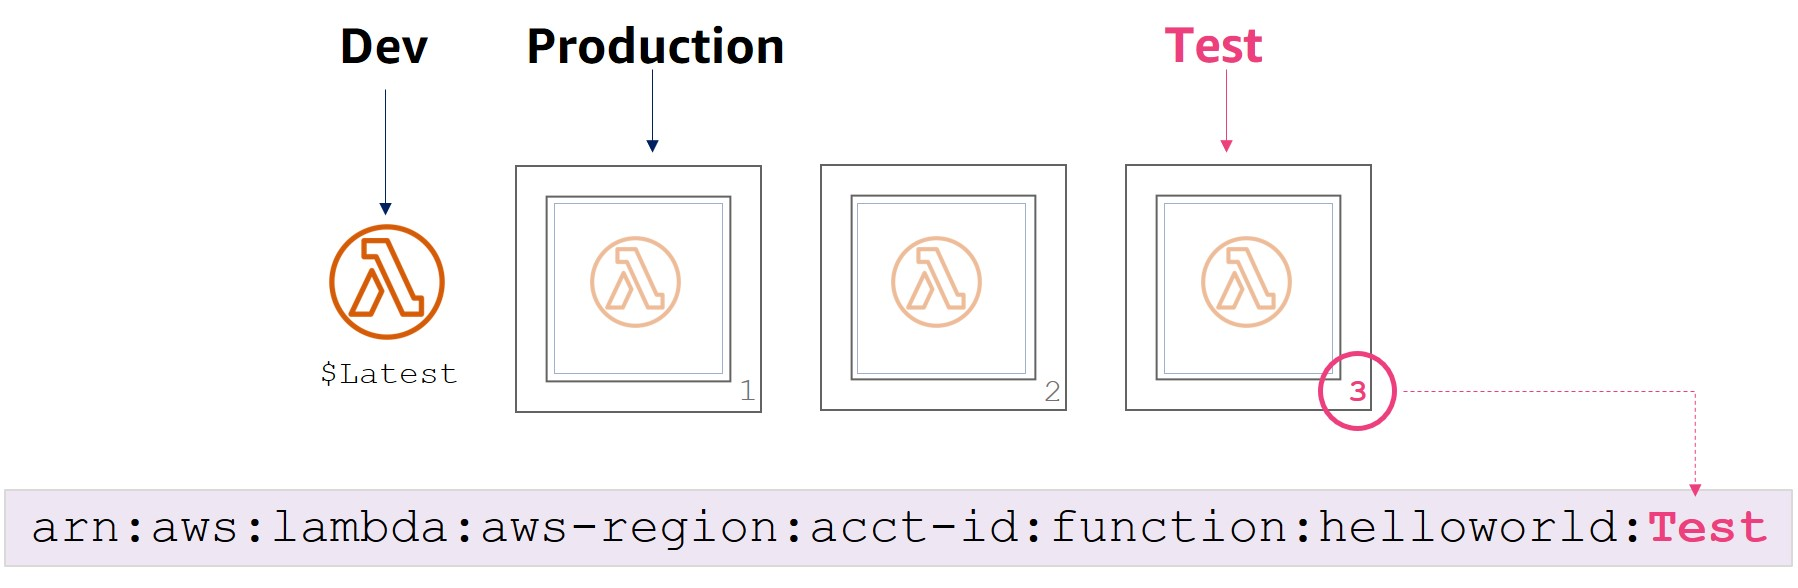


## Test using alias routing

You can also use routing configuration on an alias to send a portion of traffic to a second function version. For example, you can reduce the risk of deploying a new version by configuring the alias to send most of the traffic to the existing version and only a small percentage of traffic to the new version.

You can point an alias to a maximum of two Lambda function versions. The versions must meet the following criteria:

- Both versions must have the same runtime role.

- Both versions must have the same dead-letter queue configuration, or no dead-letter queue configuration.

- Both versions must be published. The alias cannot point to $LATEST.

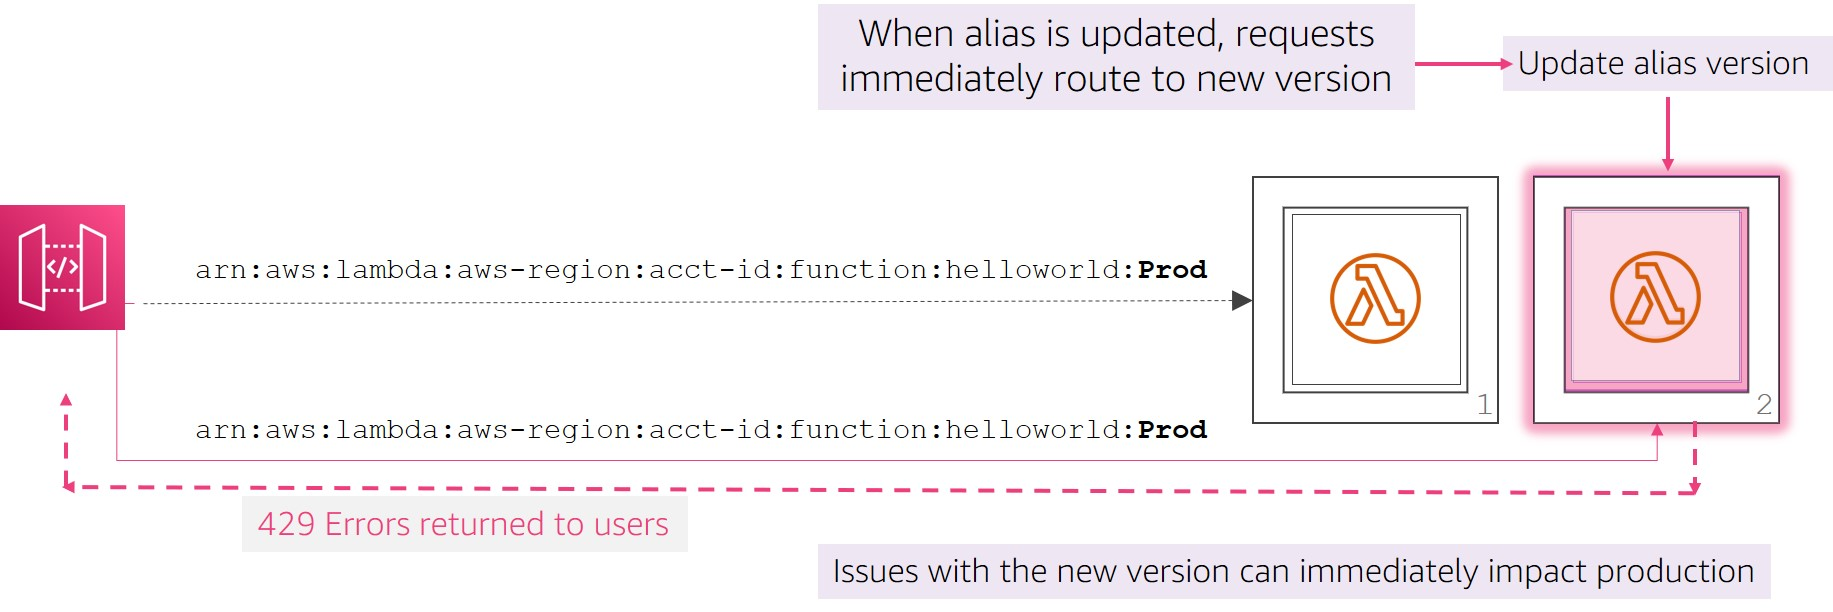

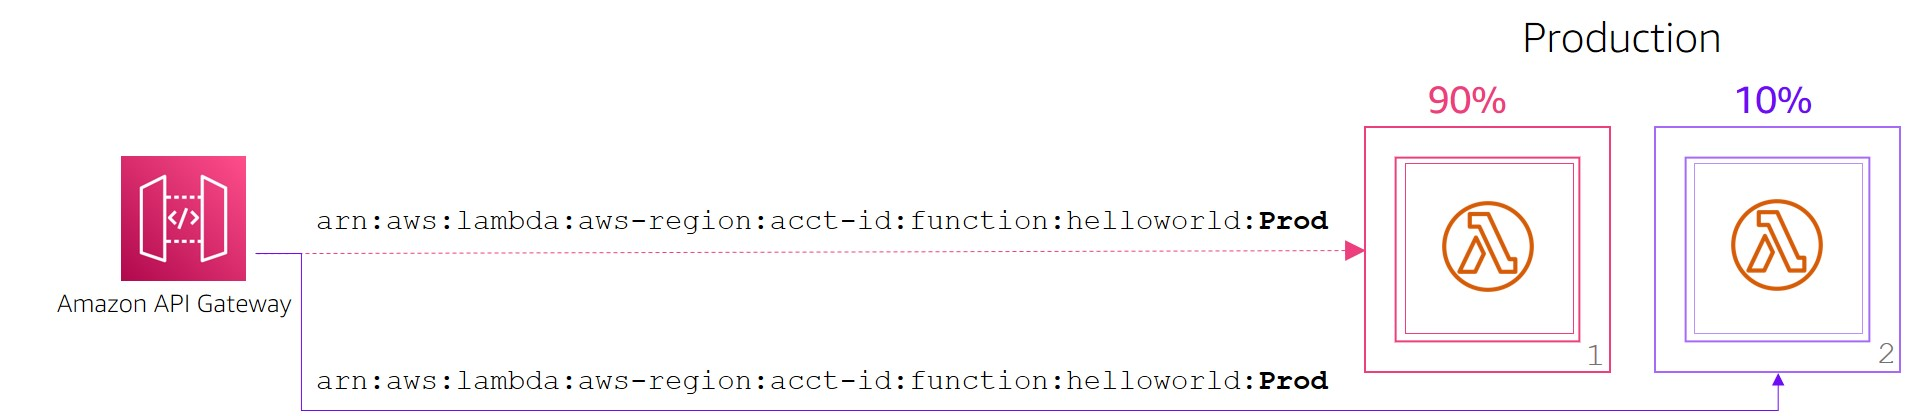

## Integrate with AWS CodeDeploy

Lambda is integrated with AWS CodeDeploy for automated rollout with traffic shifting. CodeDeploy supports multiple traffic shifting methods, in addition to alarms and hooks. CodeDeploy supports the following traffic-shifting patterns:

- Canary – Traffic is shifted in two increments. If the first increment is successful, the second is completed based on the time specified in the deployment. 
- Linear – With linear traffic shifting, traffic is slowly shifted in a predetermined percentage every X minutes based on how you have it configured. 
- All-at-once – Shifts all traffic from the original Lambda function to the updated Lambda function version at once.

Additionally, it supports the following testing options:

- Alarms – These instruct CloudWatch to monitor the deployment and trigger an alarm if any errors occurred during rollout. Any alarms would automatically roll back your deployment. 
- Hooks – Give you the option to run pre-traffic and post-traffic test functions that run sanity checks before traffic-shifting starts to the new version and after traffic-shifting completes. 

**Note:** When the alarms or hooks trigger a rollback, everything in the CloudFormation template being deployed is rolled back. Best practice is to keep your AWS SAM templates and CloudFormation templates as concise in scope as possible. As a guideline, examine no fewer than one template per service that you are deploying. 

## Shift traffic for Lambda using AWS CodeDeploy

You can use AWS SAM to configure your CodeDeploy traffic-shifting options. Review the additions to your AWS SAM template that can add safe deployment checks when using CodeDeploy.

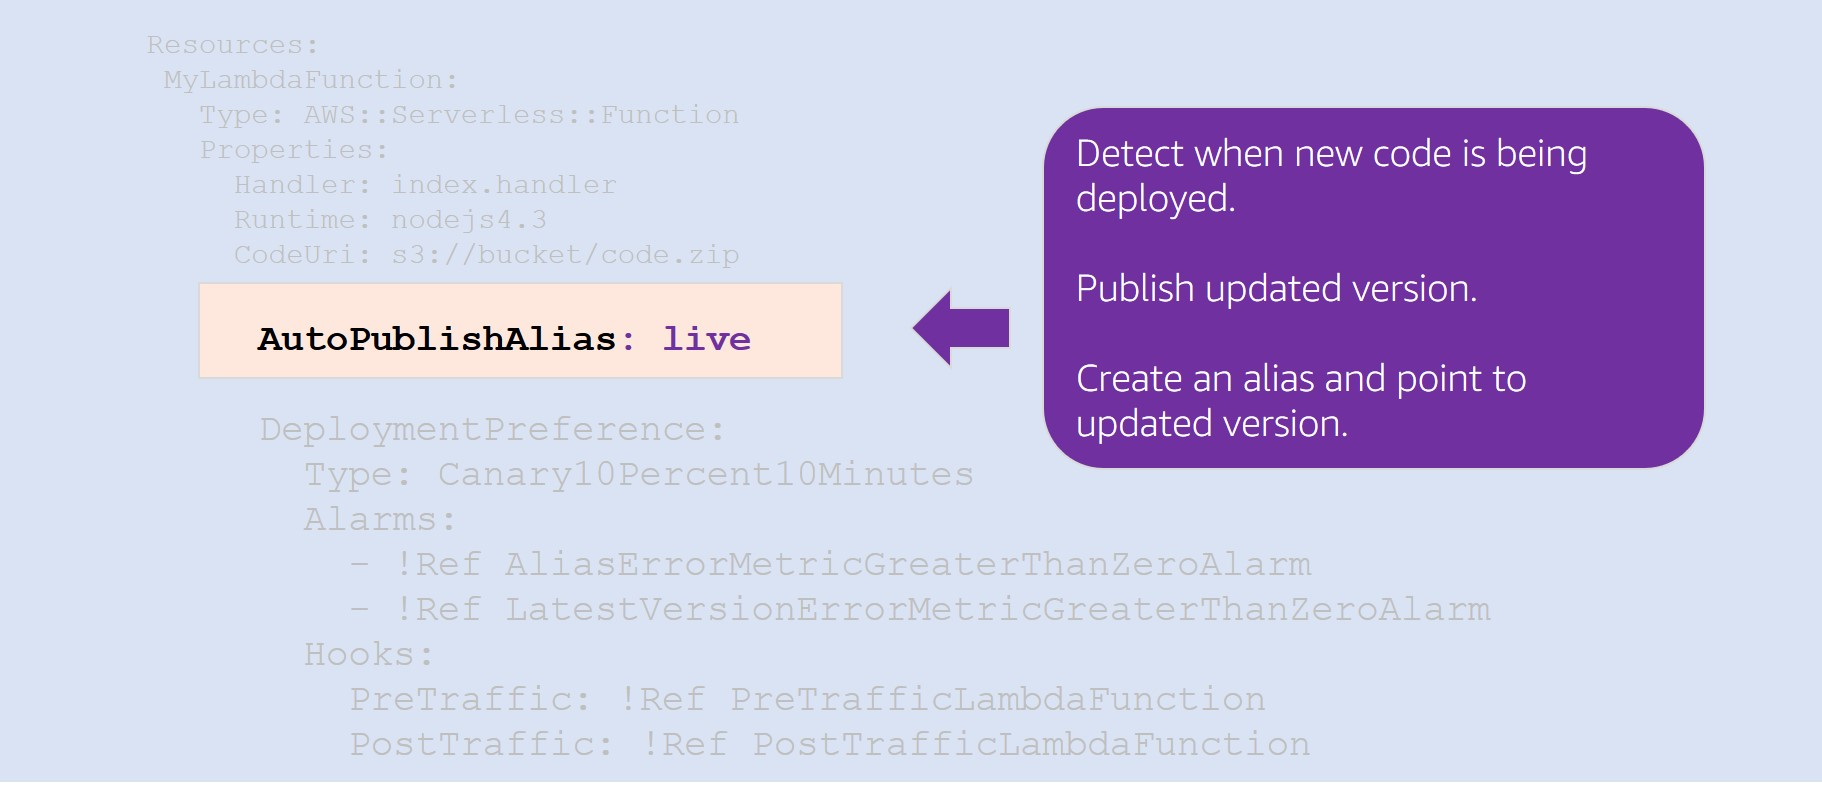

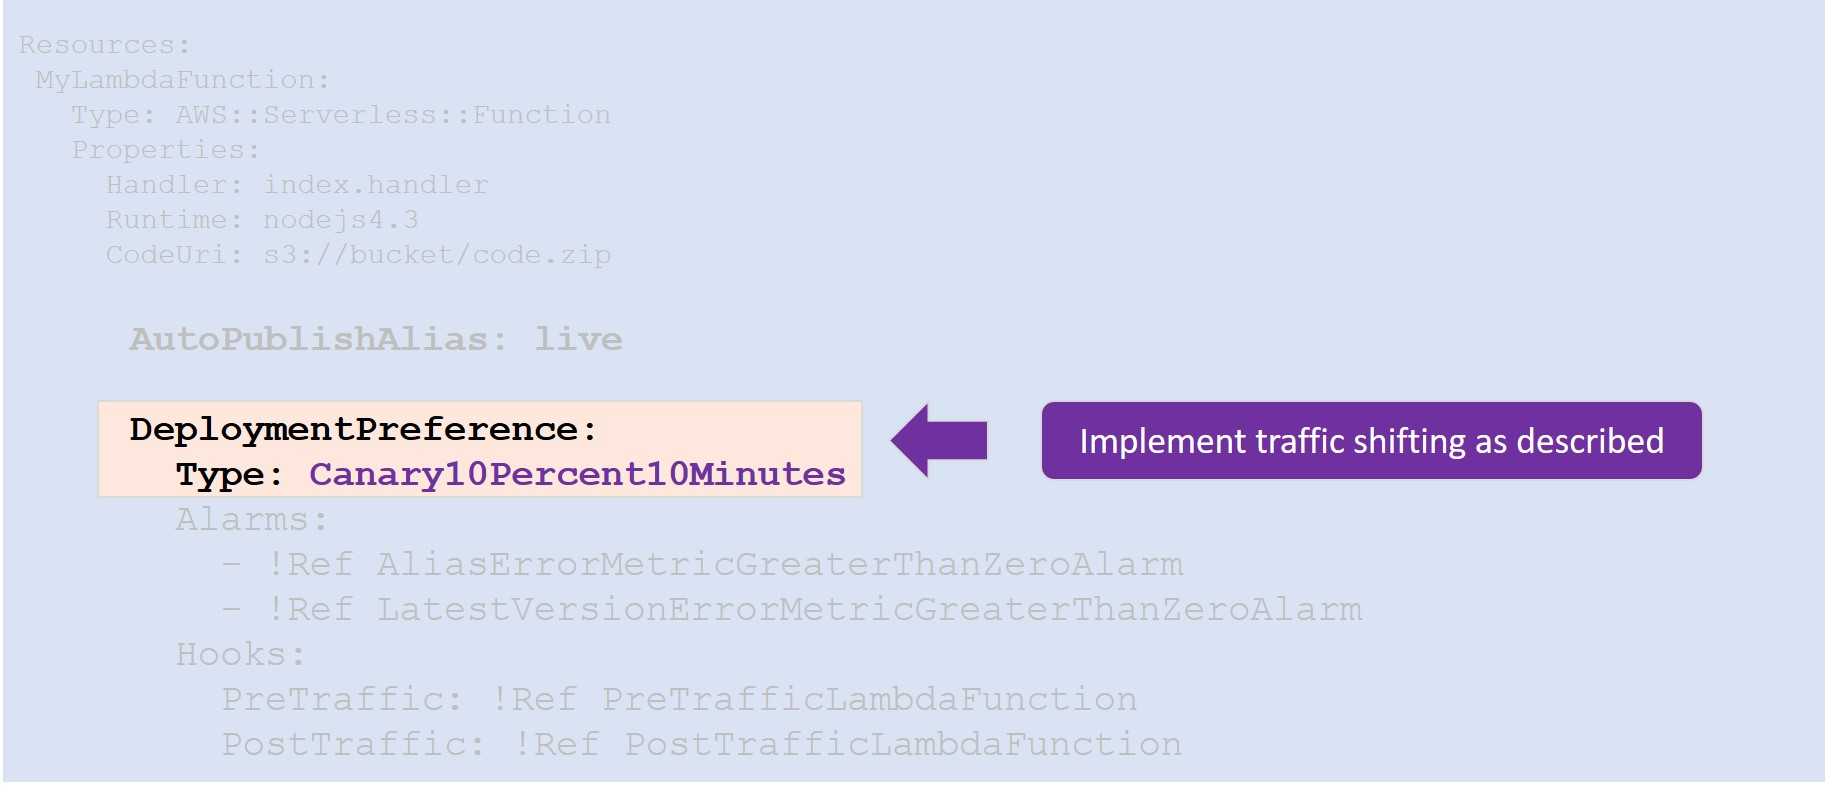

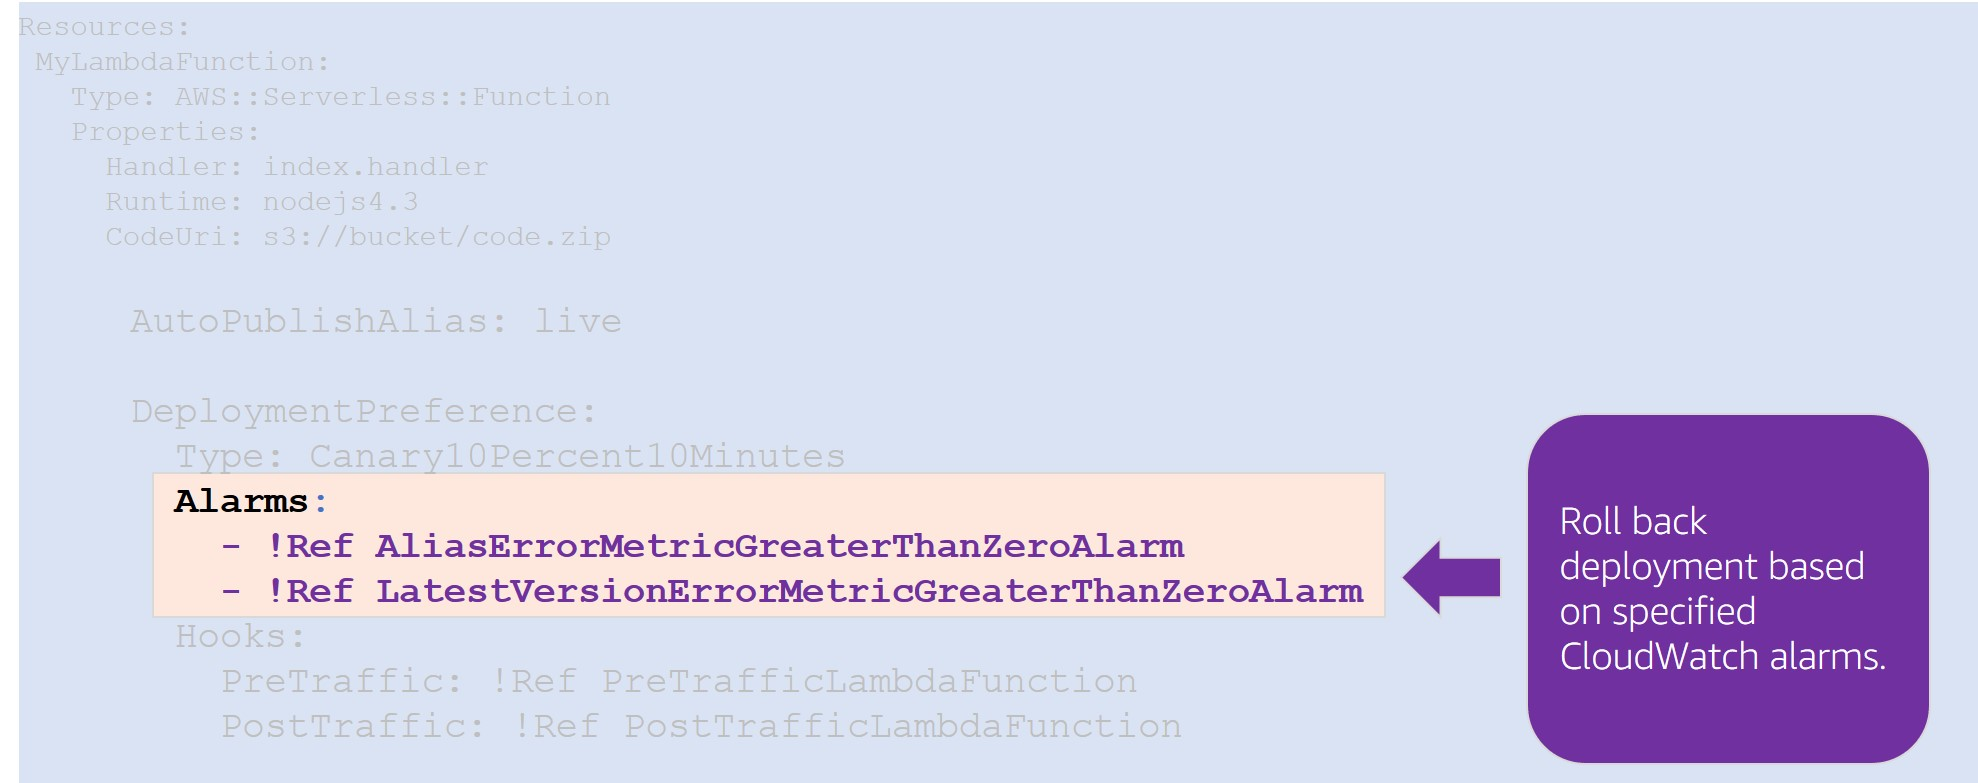

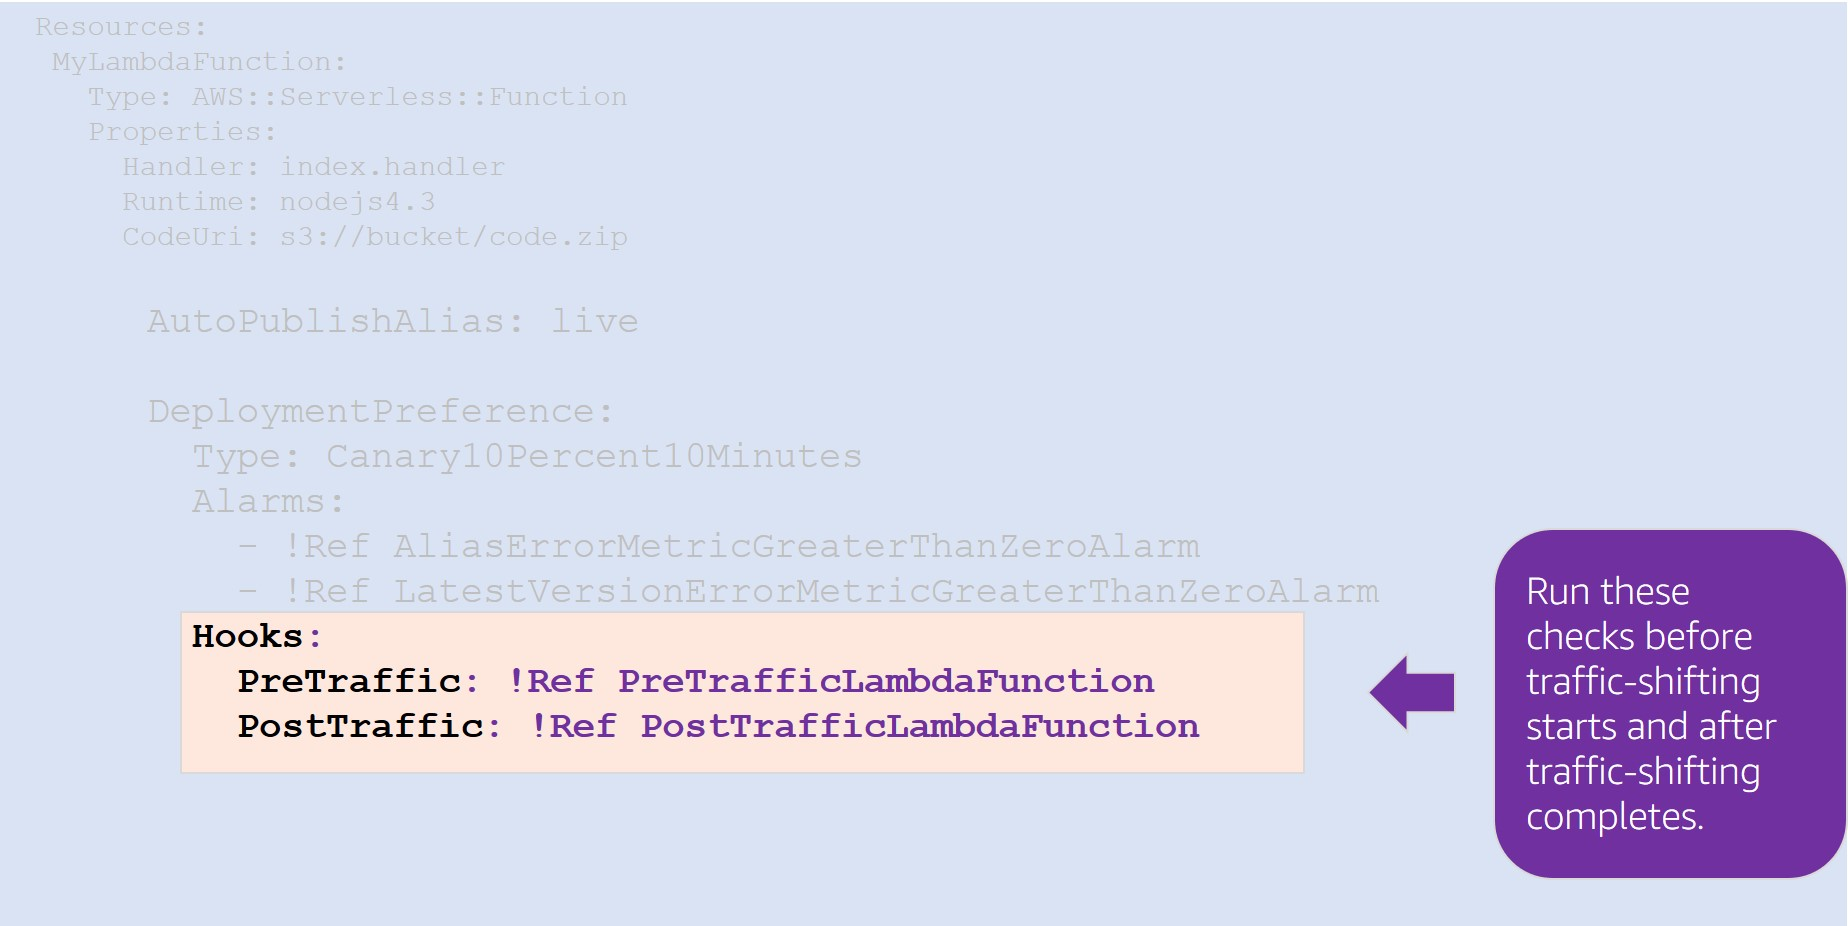